In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('../data/adult_train.csv')
test = pd.read_csv('../data/adult_test.csv')

In [3]:
X = train.drop('target', axis=1)
y = train['target']

In [4]:
X.head()

,age,workclass_cat,fnlwgt,education_cat,education-num,marital-status_cat,occupation_cat,relationship_cat,race_cat,sex_cat,capital-gain,capital-loss,hours-per-week,native-country_cat
0,39,6,77516,11,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,11,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,8,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,6,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,11,13,2,9,5,2,0,0,0,40,4


In [5]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [8]:
seed = 7
np.random.seed(seed)

# create model
model = Sequential()
model.add(Dense(18, input_dim=X_train.shape[1], init='uniform', activation='relu'))
model.add(Dense(12, init='uniform', activation='relu'))
model.add(Dense(15, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(18, input_dim=14, activation="relu", kernel_initializer="uniform")`
/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform")`
/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", kernel_initializer="uniform")`
/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", 

In [9]:
# Fit the model
model.fit(X_train.as_matrix(), y_train.as_matrix(), epochs=150, batch_size=2000, verbose=1)

Epoch 1/150
21815/21815 [==============================] - 0s - loss: 0.6656 - acc: 0.7167     
Epoch 2/150
21815/21815 [==============================] - 0s - loss: 0.5676 - acc: 0.7710     
Epoch 3/150
21815/21815 [==============================] - 0s - loss: 0.5763 - acc: 0.7276     
Epoch 4/150
21815/21815 [==============================] - 0s - loss: 0.5429 - acc: 0.7886     
Epoch 5/150
21815/21815 [==============================] - 0s - loss: 0.5417 - acc: 0.7890     
Epoch 6/150
21815/21815 [==============================] - 0s - loss: 0.5387 - acc: 0.7889     
Epoch 7/150
21815/21815 [==============================] - 0s - loss: 0.5362 - acc: 0.7908     
Epoch 8/150
21815/21815 [==============================] - 0s - loss: 0.5362 - acc: 0.7906     
Epoch 9/150
21815/21815 [==============================] - 0s - loss: 0.5273 - acc: 0.7945     
Epoch 10/150
21815/21815 [==============================] - 0s - loss: 0.5280 - acc: 0.7942     
Epoch 11/150
21815/21815 [=============

In [10]:
from sklearn.metrics import classification_report, accuracy_score

In [11]:
y_pred = model.predict_classes(X_test.as_matrix())

 7712/10746 [====================>.........] - ETA: 0s

In [12]:
print(classification_report(y_true=y_test, y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.80      0.99      0.88      8158
          1       0.84      0.22      0.35      2588

avg / total       0.81      0.80      0.75     10746



In [13]:
accuracy_score(model.predict_classes(X_train.as_matrix()), y_train) # train accuracy

19744/21815 [==========================>...] - ETA: 0s

0.80453816181526472

In [14]:
accuracy_score(model.predict_classes(test.drop('target', axis=1).as_matrix()), test['target']) # test accuracy

15200/16281 [===========================>..] - ETA: 0s

0.80504882992445181

In [15]:
from sklearn.manifold import TSNE

In [16]:
%%time
proj = TSNE(n_components=2, n_iter=250).fit_transform(X)

CPU times: user 3min 39s, sys: 16.5 s, total: 3min 55s
Wall time: 3min 56s


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

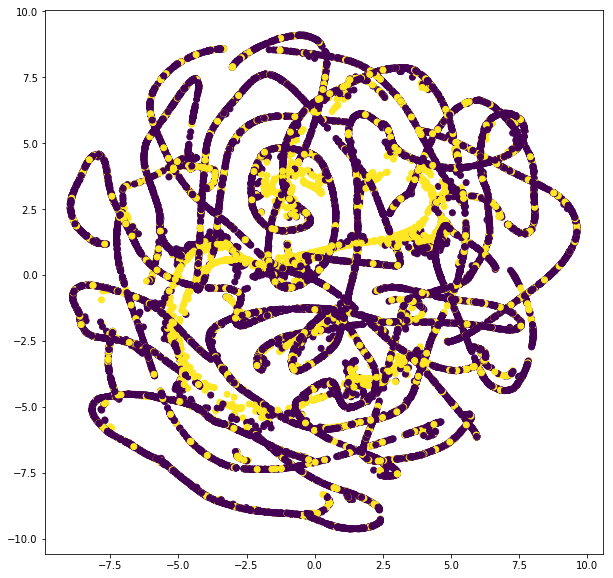

In [27]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(proj[:, 0], proj[:, 1], c=y)
plt.show()

In [28]:
import xgboost as xgb

In [29]:
xgbClf = xgb.XGBClassifier(nthread=-1)

In [30]:
%%time
xgbClf.fit(X_train, y_train)

CPU times: user 1.17 s, sys: 79 ms, total: 1.25 s
Wall time: 521 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

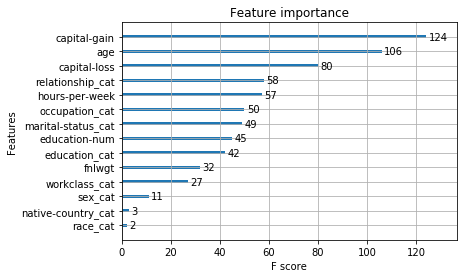

In [32]:
fig = plt.figure(figsize=(10, 10))
xgb.plot_importance(xgbClf)
plt.show()

In [33]:
accuracy_score(xgbClf.predict(X_train), y_train)

0.86986018794407516

In [34]:
accuracy_score(xgbClf.predict(X_test), y_test)

0.85911036664805507